# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 20
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df

,reviews
0,✅ Trip Verified | British Airways is absolute ...
1,✅ Trip Verified | The flight time was changed ...
2,✅ Trip Verified | I'm so fraustrated. My fli...
3,✅ Trip Verified | We have sat on this plane fo...
4,Not Verified | British Airways stranding my w...
...,...
1995,✅ Verified Review | I have flown a lot with B...
1996,✅ Verified Review | Phoenix to London Heathro...
1997,✅ Verified Review | London Heathrow to Chicag...
1998,✅ Verified Review | London Heathrow to Mumbai...


In [5]:
from pathlib import Path

# Define the path
path = "data/output.csv"

# Ensure the parent directory exists
Path(path).parent.mkdir(parents=True, exist_ok=True)

df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [11]:
df_copy = df.copy()

df_copy['reviews'] = (
    df_copy['reviews'].str.replace(r'✅ Trip Verified|Not Verified|✅ Verified Review', '', case=False, regex=True)
    .str.replace(r'^\|', '', regex=True).str.strip()   
)
df_copy

,reviews
0,| British Airways is absolute rubbish. I had t...
1,| The flight time was changed at the last minu...
2,| I'm so fraustrated. My flight was cancelle...
3,| We have sat on this plane for an hour and fo...
4,| British Airways stranding my wife and I at ...
...,...
1995,| I have flown a lot with British Airways and...
1996,| Phoenix to London Heathrow. Due to a proble...
1997,| London Heathrow to Chicago O'Hare and my ex...
1998,| London Heathrow to Mumbai. I've been a loya...


In [ ]:
# remove | from the reviews
df_copy['reviews']= (df_copy['reviews'].str.replace(r'^\|', '', regex=True))  
df_copy

,reviews
0,British Airways is absolute rubbish. I had to...
1,The flight time was changed at the last minut...
2,I'm so fraustrated. My flight was cancelled...
3,We have sat on this plane for an hour and for...
4,British Airways stranding my wife and I at H...
...,...
1995,I have flown a lot with British Airways and ...
1996,Phoenix to London Heathrow. Due to a problem...
1997,London Heathrow to Chicago O'Hare and my exp...
1998,London Heathrow to Mumbai. I've been a loyal...


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

plt.style.use('ggplot')

import nltk
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import classification_report, confusion_matrix

In [14]:
# access individual review
l = df_copy['reviews'].iloc[999]
l

'  London Heathrow to Inverness. Having previously written a review about the shockingly appalling experience with BA so far this summer, I felt the need to update with a new review as the final flight home I was rebooked on - after short-notice cancellation, which I had to wait over a day for - was also  cancelled due to a fault with the aircraft. We were sat on the plane for over an hour whilst the crew were waiting to hear from ground crew what was happening and where to go. Eventually got off the plane to utter chaos - mixed messages being given by ground crew. Some people given details about rebooking, others given nothing. Some people were sent texts with rebooking options, others (including me) received nothing. Vouchers handed out for hotel accommodation and shuttle bus to and from the hotels - however some people were only given one bus voucher, meaning they had no means to return to the airport the next day! Some people rebooked on a flight in two days time and told they’d ha

In [16]:
# check for null values in the reviews
df_copy.isnull().sum()

reviews    0
dtype: int64

In [12]:
# Convert text to lowercase
df_copy['reviews'] = df_copy['reviews'].str.lower()
df_copy


,reviews
0,i'm so fraustrated. my flight was cancelled...
1,we have sat on this plane for an hour and for...
2,british airways stranding my wife and i at h...
3,"although like many these days, i avoid ba o..."
4,this flight was british airways at its very b...
...,...
995,malaga to london heathrow . a shambolic airl...
996,sydney to singapore. extremely disappointed ...
997,london heathrow to inverness. having previou...
998,heathrow to glasgow. again flight is delayed...


# nltk

In [20]:
review_example = df_copy['reviews'][3]
review_example

' We have sat on this plane for an hour and forty five minutes awaiting takeoff due to bad weather in London. This is understandable for safety. Fortunately I have a long layover so this delay does not affect me. However many others are not so lucky. While waiting we were given one small bottle of water and one tiny pack of corn kernels. Later food and drink were offered for purchase. This is my complaint. After sitting idle on this plane for nearly two hours and possibly missing connecting flights they can’t give us a free bag of chips and a coke? When I asked I was told no. Is British Airways really this cheap and money grubbing?'

In [21]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

token = nltk.word_tokenize(review_example)
token[:5]

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [Errno 11001] getaddrinfo failed>


['We', 'have', 'sat', 'on', 'this']

In [22]:
# part of speech tag for each word

tagged = nltk.pos_tag(token)
tagged[:5]

[('We', 'PRP'), ('have', 'VBP'), ('sat', 'VBN'), ('on', 'IN'), ('this', 'DT')]

## Step1: VADER seniment analysis

In [24]:
# alternative
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [25]:
# alternative
sia.polarity_scores('i am so sad!')

{'neg': 0.648, 'neu': 0.352, 'pos': 0.0, 'compound': -0.5697}

In [26]:
nltk.download('stopwords')
from nltk.corpus import stopwords

# Remove stop words (words Don't add meaning to sentence)
stop_words = set(stopwords.words('english'))
df_copy['reviews'] = df_copy['reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
df_copy

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


,reviews
0,British Airways absolute rubbish. I fly Amster...
1,The flight time changed last minute without wa...
2,I'm fraustrated. My flight cancelled last minu...
3,We sat plane hour forty five minutes awaiting ...
4,British Airways stranding wife I Heathrow Airp...
...,...
1995,I flown lot British Airways airlines constantl...
1996,Phoenix London Heathrow. Due problem ticket fi...
1997,London Heathrow Chicago O'Hare experience wond...
1998,London Heathrow Mumbai. I've loyal BA customer...


In [27]:
# Stemming
stemmer = PorterStemmer()
df_copy['reviews'] = df_copy['reviews'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
df_copy

,reviews
0,british airway absolut rubbish. i fli amsterda...
1,the flight time chang last minut without warn ...
2,"i'm fraustrated. my flight cancel last minute,..."
3,we sat plane hour forti five minut await takeo...
4,british airway strand wife i heathrow airport ...
...,...
1995,i flown lot british airway airlin constantli a...
1996,phoenix london heathrow. due problem ticket fi...
1997,london heathrow chicago o'har experi wonderful...
1998,london heathrow mumbai. i'v loyal ba custom se...


In [28]:
print(df_copy.describe())

                                                  reviews
count                                                2000
unique                                               2000
top     british airway absolut rubbish. i fli amsterda...
freq                                                    1


 # EDA

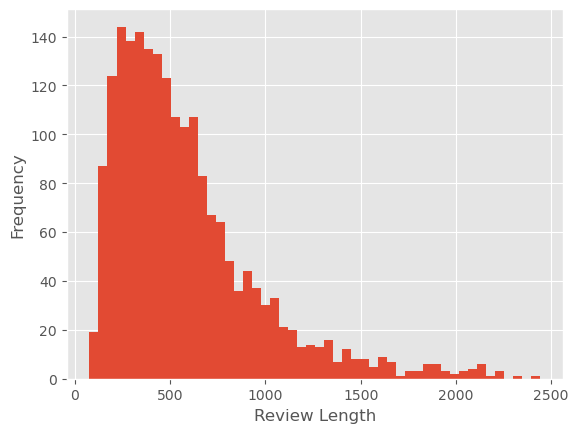

In [29]:
df_copy['review_length'] = df_copy['reviews'].apply(len)
plt.hist(df_copy['review_length'], bins=50)
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

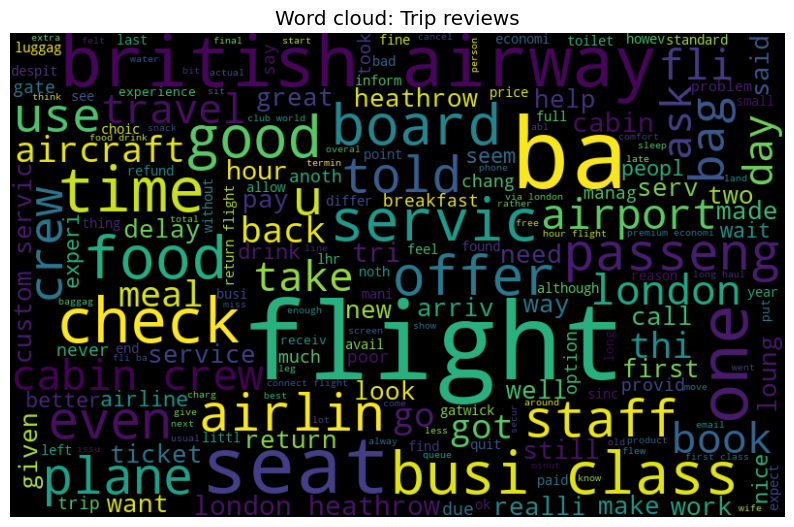

In [60]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(df_copy['reviews']))
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Word cloud: Trip reviews')
plt.axis('off')
plt.show()

In [ ]:
# need to plot a bar graph of count of words that appear more
#Top word

In [34]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['reviews'])
vectorizer

TfidfVectorizer()

In [35]:
from textblob import TextBlob

def sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

df_copy['sentiment'] = df_copy['reviews'].apply(sentiment)

y = df_copy['sentiment']
df_copy

,reviews,review_length,sentiment
0,british airway absolut rubbish. i fli amsterda...,578,negative
1,the flight time chang last minut without warn ...,258,positive
2,"i'm fraustrated. my flight cancel last minute,...",884,negative
3,we sat plane hour forti five minut await takeo...,438,negative
4,british airway strand wife i heathrow airport ...,410,neutral
...,...,...,...
1995,i flown lot british airway airlin constantli a...,301,positive
1996,phoenix london heathrow. due problem ticket fi...,807,negative
1997,london heathrow chicago o'har experi wonderful...,1101,positive
1998,london heathrow mumbai. i'v loyal ba custom se...,942,negative


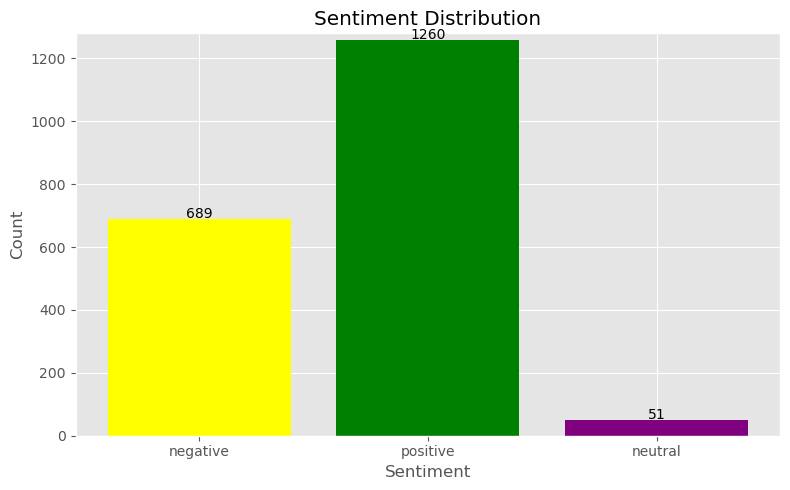

In [59]:
sentiment_counts = {}

# Iterate through unique sentiments and count occurrences
for sentiment in df_copy['sentiment'].unique():
    sentiment_counts[sentiment] = (df_copy['sentiment'] == sentiment).sum()

sentiments = list(sentiment_counts.keys())
counts = list(sentiment_counts.values())

# Create the bar chart
plt.figure(figsize=(8, 5))
plt.bar(sentiments, counts, color=['yellow', 'green', 'purple'])

# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.xticks(sentiments)
plt.ylim(0, max(counts) + 20)  # Add some padding above bars for readability

# Annotate the bars with counts
for i, count in enumerate(counts):
    plt.text(i, count + 2, str(count), ha='center', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

In [56]:
sentiments_counts = {}

# Iterate through unique sentiments and count occurrences
for sentiment in df_copy['sentiment'].unique():
    sentiments_counts[sentiment] = (df_copy['sentiment'] == sentiment).sum()

# Display the counts
print(sentiments_counts)

{'negative': 689, 'positive': 1260, 'neutral': 51}


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
model_clf = MultinomialNB()
model_clf.fit(X_train, y_train)

MultinomialNB()

In [39]:
y_pred = model_clf.predict(X_test)
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       135
     neutral       0.00      0.00      0.00         8
    positive       0.64      1.00      0.78       257

    accuracy                           0.64       400
   macro avg       0.21      0.33      0.26       400
weighted avg       0.41      0.64      0.50       400



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


array([[  0,   0, 135],
       [  0,   0,   8],
       [  0,   0, 257]], dtype=int64)

In [61]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

    negative       0.72      0.36      0.48       135
     neutral       0.00      0.00      0.00         8
    positive       0.72      0.93      0.81       257

    accuracy                           0.72       400
   macro avg       0.48      0.43      0.43       400
weighted avg       0.70      0.72      0.68       400



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


array([[ 48,   0,  87],
       [  2,   0,   6],
       [ 17,   0, 240]], dtype=int64)